<a href="https://colab.research.google.com/github/Satyanarayana53/FMML_Projects_and_labs/blob/main/FMML_M4Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [27]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [28]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [29]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

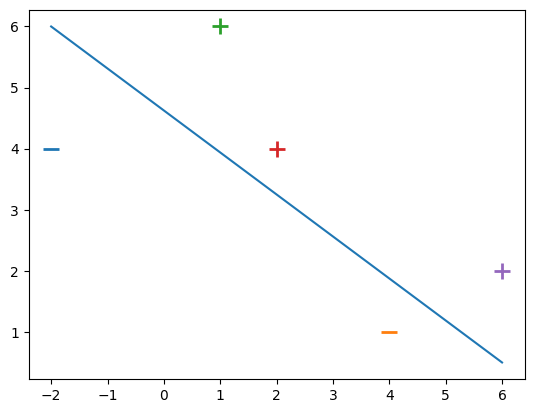

In [30]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

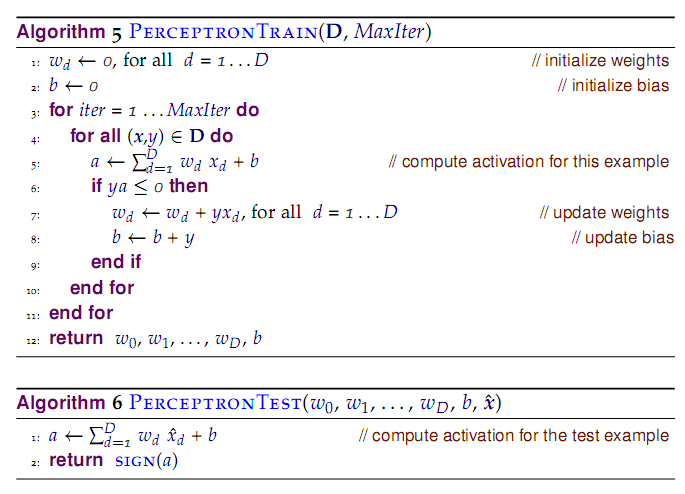

The algorithm is shown in the above image.

In [31]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [32]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

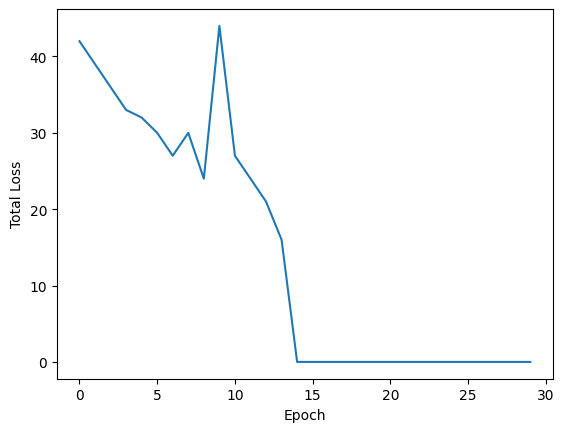

In [33]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

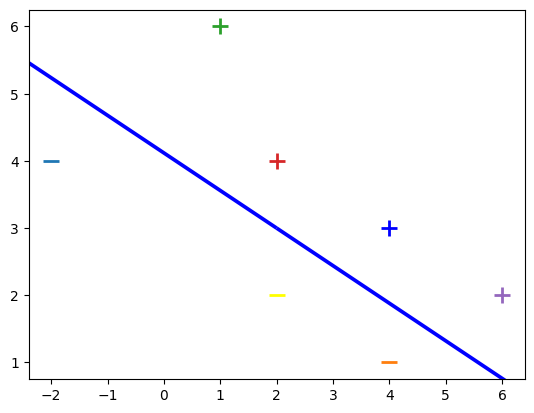

In [34]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

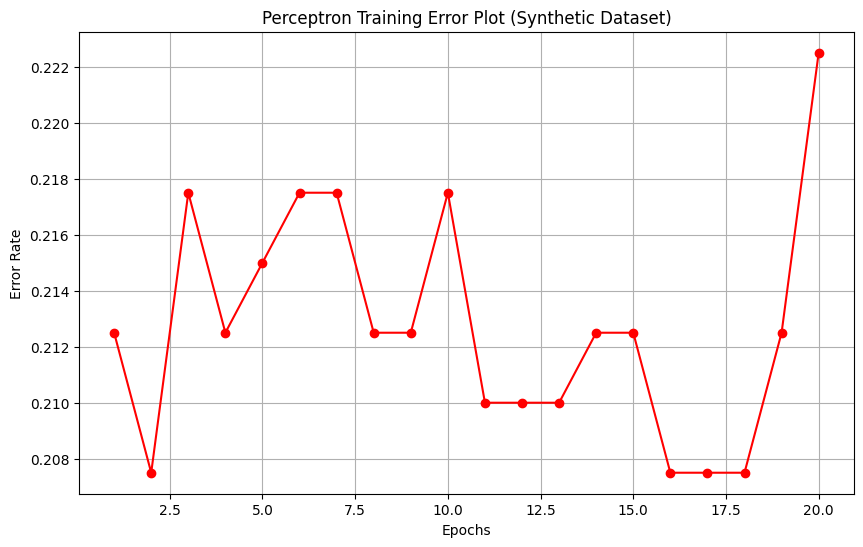

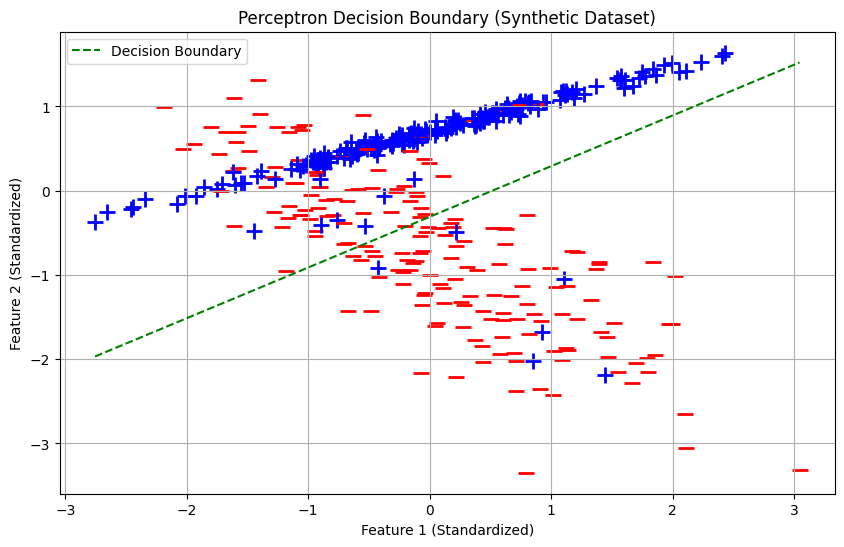

In [35]:
# Re-import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X_sim, y_sim = make_classification(
    n_samples=500,  # Number of samples
    n_features=2,   # Two features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,     # 10% label noise
    random_state=42
)

# Convert target labels to match the perceptron's expected format (-1 and 1)
y_sim = np.where(y_sim == 0, -1, 1)

# Split the synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X_sim, y_sim, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reinitialize Perceptron model for training
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
errors = []

for _ in range(20):  # Perform 20 epochs
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y_sim))
    predictions = perceptron.predict(X_train)
    errors.append(np.mean(predictions != y_train))

# Plot the error plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, marker='o', color='r')
plt.title("Perceptron Training Error Plot (Synthetic Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.grid()
plt.show()

# Extract weights and bias for decision boundary visualization
w = perceptron.coef_[0]
b = perceptron.intercept_

# Visualize the decision boundary
plt.figure(figsize=(10, 6))
for i, sample in enumerate(X_train):
    color = 'blue' if y_train[i] == 1 else 'red'
    marker = '+' if y_train[i] == 1 else '_'
    plt.scatter(sample[0], sample[1], color=color, marker=marker, s=120, linewidths=2)

# Decision boundary
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary')

plt.title("Perceptron Decision Boundary (Synthetic Dataset)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid()
plt.show()


2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

The learning rate is not explicitly configured in the Perceptron class from sklearn, as it uses a fixed algorithm-based learning rate. However, if you want to test the effect of class size you can use perceptron from scratch or search libraries where class size is a tunable parameter

For a Perceptron example in scikit-learning:

Too high an explicit number of studies may prevent the model from converging, as it may exceed the optimal weight several times.
If you use your own perceptron or use another library where the number of classes can be controlled, a further increase in the number of classes can confound the model.
Modify the rules to include the number of classes:
You can test this idea manually by reusing a perceptron:

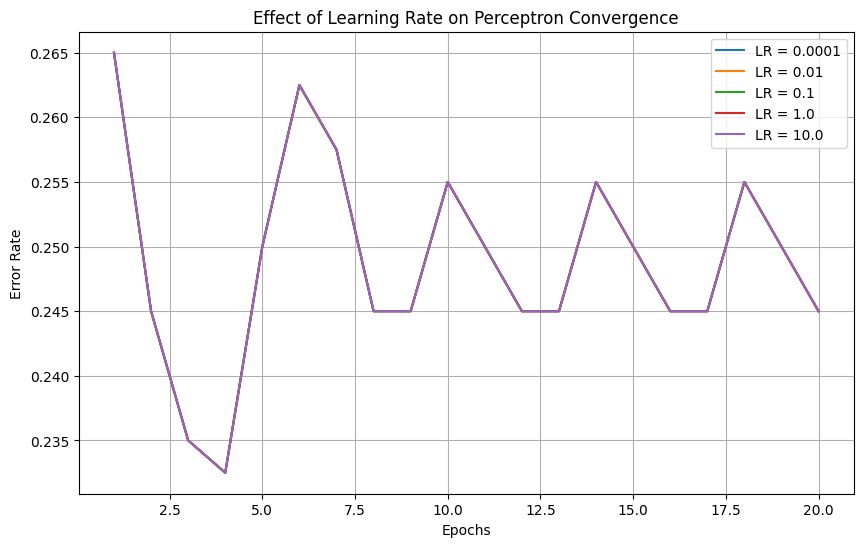

In [36]:
# Manual Perceptron implementation to control learning rate
class ManualPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        errors = []

        for _ in range(self.epochs):
            error_count = 0
            for idx, x_i in enumerate(X):
                update = self.learning_rate * (y[idx] - self.predict(x_i))
                self.weights += update * x_i
                self.bias += update
                if update != 0:  # Count updates as errors
                    error_count += 1
            errors.append(error_count / n_samples)

        return errors

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, -1)


# Train with varying learning rates
learning_rates = [0.0001, 0.01, 0.1, 1.0, 10.0]
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    perceptron = ManualPerceptron(learning_rate=lr, epochs=20)
    errors = perceptron.fit(X_train, y_train)
    plt.plot(range(1, 21), errors, label=f"LR = {lr}")

plt.title("Effect of Learning Rate on Perceptron Convergence")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.legend()
plt.grid()
plt.show()


**Observations to Look For:**
* Small Learning Rate: Convergence is slow, requiring more iterations to minimize errors.
* Optimal Learning Rate: Convergence happens relatively quickly and stably.
* Large Learning Rate: The algorithm might diverge, with the error rate either stagnating or increasing due to overshooting.

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

When jogging the Perceptron algorithm on a toy dataset that is not linearly separable, the set of rules cannot discover a selection boundary that separates the facts flawlessly. The Perceptron algorithm is based on the assumption that the dataset is linearly separable, and if this assumption fails, the set of rules both:

Fails to converge: The weights maintain oscillating because the model attempts to regulate to conflicting samples.
Stops after reaching the maximum iterations (in scikit-research's case): Without perfect separability, the set of rules will terminate without a legitimate solution.
Let's demonstrate this with an instance the usage of the XOR dataset, which isn't always linearly separable:


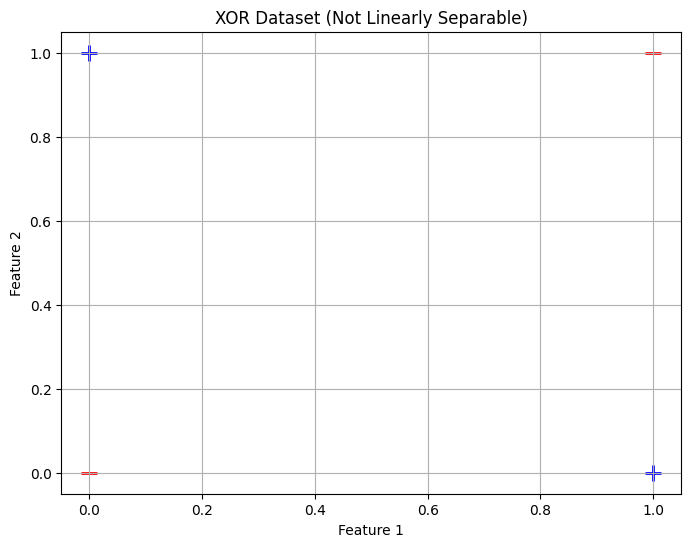

<ipython-input-37-887064862d71>:30: RuntimeWarning: invalid value encountered in divide
  y_vals = -(w[0] * x_vals + b) / w[1]


Error Rate on XOR dataset: 0.5
No valid decision boundary found.


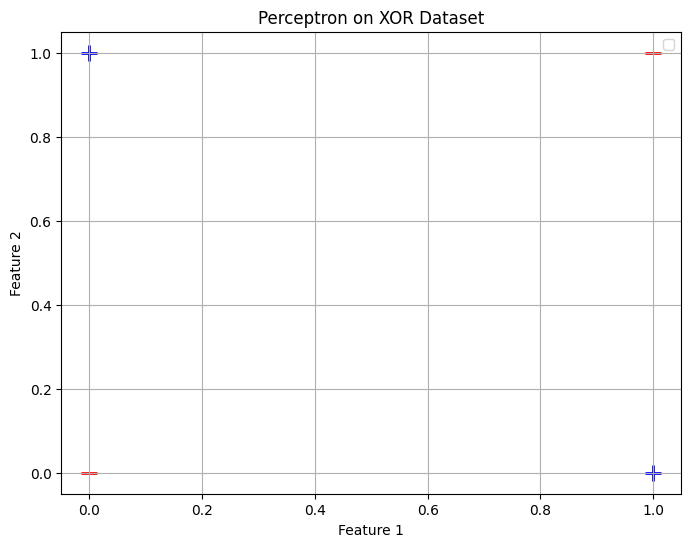

In [37]:
# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([-1, 1, 1, -1])  # XOR labels

# Plot the XOR dataset
plt.figure(figsize=(8, 6))
for i, point in enumerate(X_xor):
    color = 'blue' if y_xor[i] == 1 else 'red'
    marker = '+' if y_xor[i] == 1 else '_'
    plt.scatter(point[0], point[1], color=color, marker=marker, s=120, linewidths=2)
plt.title("XOR Dataset (Not Linearly Separable)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# Train Perceptron on XOR dataset
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_xor, y_xor)

# Evaluate and visualize the results
predictions = perceptron.predict(X_xor)
error_rate = np.mean(predictions != y_xor)
print(f"Error Rate on XOR dataset: {error_rate}")

# Visualize decision boundary (if possible)
w = perceptron.coef_[0]
b = perceptron.intercept_
x_vals = np.linspace(0, 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.figure(figsize=(8, 6))
for i, point in enumerate(X_xor):
    color = 'blue' if y_xor[i] == 1 else 'red'
    marker = '+' if y_xor[i] == 1 else '_'
    plt.scatter(point[0], point[1], color=color, marker=marker, s=120, linewidths=2)

if perceptron.coef_[0][1] != 0:  # Check if the decision boundary exists
    plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary')
else:
    print("No valid decision boundary found.")

plt.title("Perceptron on XOR Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.legend()
plt.show()


Observations
1. No Linear Decision Boundary:

* The XOR dataset is not linearly separable, so the Perceptron fails to find a line that separates the two classes.
* The weights oscillate, and the algorithm stops either due to hitting the maximum iterations or due to tolerance limits.

2. Non-Zero Error Rate:

* Even after training, some points are misclassified because the linear decision boundary is inherently insufficient for the XOR problem.
* The error rate is greater than zero and does not improve with further training.

3. Visualization:
* If the dataset is visualized, the two classes in the XOR dataset form a pattern that clearly shows the need for a nonlinear decision boundary.

In [38]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [39]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


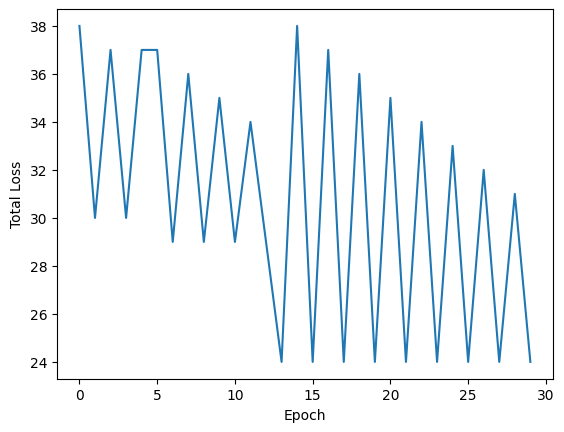

In [40]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

* Dataset (Boolean AND Function)

The AND function's truth table:

|   |   |      |
|---|---|------|
| x1 | x2 |  y |
| 0  | 0  |  -1 |
| 0  | 1  |  -1 |
| 1  | 0  |  -1 |
| 1  | 1  |  +1 |


Inputs:
𝑥=(𝑥1,𝑥2)∈{0,1}×{0,1}x=(x 1 ,x 2​)∈{0,1}×{0,1}

Outputs:
𝑦∈{−1,+1} (where -1 = "false" and +1 = "true").

2. Is this dataset learnable by the Perceptron?
Yes, this dataset is linearly separable. A linear decision boundary exists that separates the
𝑦=−1 points from the
𝑦=+1 point:

* In the 2D plane, (𝑥1,𝑥2)=(1,1) is the only point whee
𝑦=+1, while the other three points have y=−1.
* A Perceptron can learn this dataset because there is a straight line (decision boundary) that separates these two classes.

3. Weights Update Procedure for the Perceptron
The Perceptron updates weights using the rule:

𝑤𝑡+1=𝑤𝑡+𝜂⋅(𝑦−𝑦^)⋅𝑥

Here:

wt =[w 1​,w 2​]: Weight vector.

𝑏𝑡: Bias term.

η: Learning rate (assume 𝜂=1 for simplicity).

𝑦^=sign(𝑤𝑡⋅𝑥+𝑏𝑡): Predicted output.

Given

w
0
​
 =[0,0] and
b
0
​
 =0, let's calculate the updates for each training point.

Iteration-by-Iteration Updates
Initial values:

w
0
​
 =[0,0]

b
0
​
 =0
Epoch 1 (Go through each point in sequence):
Point
(x
1
​
 ,x
2
​
 )=(0,0),y=−1:

𝑦
^
=
sign
(
[
0
,
0
]
⋅
[
0
,
0
]
+
0
)
=
sign
(
0
)
=
0
y
^
​
 =sign([0,0]⋅[0,0]+0)=sign(0)=0
𝑦
^
≠
𝑦
y
^
​


=y, so update weights:

𝑤
1
=
[
0
,
0
]
+
(
−
1
−
0
)
⋅
[
0
,
0
]
=
[
0
,
0
]
w
1
​
 =[0,0]+(−1−0)⋅[0,0]=[0,0]
𝑏
1
=
0
+
(
−
1
−
0
)
=
−
1
b
1
​
 =0+(−1−0)=−1
Point
(
𝑥
1
,
𝑥
2
)
=
(
0
,
1
)
,
𝑦
=
−
1
(x
1
​
 ,x
2
​
 )=(0,1),y=−1:

𝑦
^
=
sign
(
[
0
,
0
]
⋅
[
0
,
1
]
−
1
)
=
sign
(
−
1
)
=
−
1
y
^
​
 =sign([0,0]⋅[0,1]−1)=sign(−1)=−1
𝑦
^
=
𝑦
y
^
​
 =y, so no update:

𝑤
2
=
[
0
,
0
]
,
𝑏
2
=
−
1
w
2
​
 =[0,0],b
2
​
 =−1
Point
(
𝑥
1
,
𝑥
2
)
=
(
1
,
0
)
,
𝑦
=
−
1
(x
1
​
 ,x
2
​
 )=(1,0),y=−1:

𝑦
^
=
sign
(
[
0
,
0
]
⋅
[
1
,
0
]
−
1
)
=
sign
(
−
1
)
=
−
1
y
^
​
 =sign([0,0]⋅[1,0]−1)=sign(−1)=−1
𝑦
^
=
𝑦
y
^
​
 =y, so no update:

𝑤
3
=
[
0
,
0
]
,
𝑏
3
=
−
1
w
3
​
 =[0,0],b
3
​
 =−1
Point
(
𝑥
1
,
𝑥
2
)
=
(
1
,
1
)
,
𝑦
=
+
1
(x
1
​
 ,x
2
​
 )=(1,1),y=+1:

𝑦
^
=
sign
(
[
0
,
0
]
⋅
[
1
,
1
]
−
1
)
=
sign
(
−
1
)
=
−
1
y
^
​
 =sign([0,0]⋅[1,1]−1)=sign(−1)=−1
𝑦
^
≠
𝑦
y
^
​


=y, so update weights:

𝑤
4
=
[
0
,
0
]
+
(
1
−
(
−
1
)
)
⋅
[
1
,
1
]
=
[
2
,
2
]
w
4
​
 =[0,0]+(1−(−1))⋅[1,1]=[2,2]
𝑏
4
=
−
1
+
(
1
−
(
−
1
)
)
=
1
b
4
​
 =−1+(1−(−1))=1
Epoch 2 (Go through the points again):
Repeat the process. After the second epoch, the weights will not change further as the decision boundary is learned.
Final Weights and Decision Boundary
After convergence:

𝑤
=
[
2
,
2
]
w=[2,2]
𝑏
=
1
b=1
The decision boundary is:

2
𝑥
1
+
2
𝑥
2
+
1
=
0
or
𝑥
1
+
𝑥
2
=
−
0.5
2x
1
​
 +2x
2
​
 +1=0orx
1
​
 +x
2
​
 =−0.5



In [41]:
import numpy as np

# Dataset: AND function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([-1, -1, -1, 1])  # Target outputs (-1 for false, +1 for true)

# Initialize weights and bias
w = np.array([0.0, 0.0])  # weights (w0, w1)
b = 0.0  # bias
learning_rate = 1  # Learning rate
epochs = 10  # Number of epochs

# Perceptron training
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    for i in range(len(X)):
        # Calculate the prediction
        x_i = X[i]
        y_true = y[i]
        linear_output = np.dot(w, x_i) + b
        y_pred = np.sign(linear_output)  # Prediction: +1 or -1

        # Update rule
        if y_pred != y_true:  # Misclassified
            w += learning_rate * y_true * x_i
            b += learning_rate * y_true
            print(f"  Updated weights: {w}, bias: {b}")
        else:
            print(f"  No update needed for input {x_i}")

    # Check if the perceptron has converged
    predictions = np.sign(np.dot(X, w) + b)
    if np.array_equal(predictions, y):
        print("Perceptron has converged.")
        break

# Final weights and bias
print("\nFinal weights and bias:")
print(f"Weights: {w}, Bias: {b}")


Epoch 1
  Updated weights: [0. 0.], bias: -1.0
  No update needed for input [0 1]
  No update needed for input [1 0]
  Updated weights: [1. 1.], bias: 0.0
Epoch 2
  Updated weights: [1. 1.], bias: -1.0
  Updated weights: [1. 0.], bias: -2.0
  No update needed for input [1 0]
  Updated weights: [2. 1.], bias: -1.0
Epoch 3
  No update needed for input [0 0]
  Updated weights: [2. 0.], bias: -2.0
  Updated weights: [1. 0.], bias: -3.0
  Updated weights: [2. 1.], bias: -2.0
Epoch 4
  No update needed for input [0 0]
  No update needed for input [0 1]
  Updated weights: [1. 1.], bias: -3.0
  Updated weights: [2. 2.], bias: -2.0
Epoch 5
  No update needed for input [0 0]
  Updated weights: [2. 1.], bias: -3.0
  No update needed for input [1 0]
  Updated weights: [3. 2.], bias: -2.0
Epoch 6
  No update needed for input [0 0]
  Updated weights: [3. 1.], bias: -3.0
  Updated weights: [2. 1.], bias: -4.0
  Updated weights: [3. 2.], bias: -3.0
Epoch 7
  No update needed for input [0 0]
  No updat

2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Perceptron Learnability: A Perceptron can only learn a boolean function if it is linearly separable. This means that in the 2D input space formed by
𝑥
1
  and
x
2
​
 , there must exist a straight line that separates the outputs
y=+1 from

y=−1.

2-Bit Input Space: The inputs
(x
1
​
 ,x
2
​
 ) for a 2-bit binary function form the following truth table:

|   |   |      |
|---|---|------|
| x1 | x2 |  y |
| 0  | 0  |  y1 |
| 0  | 1  |  y2 |
| 1  | 0  |  y3 |
| 1  | 1  |  y4 |

Each possible boolean function assigns outputs (
y
1
​
 ,y
2
​
 ,y
3
​
 ,y
4
​
 ) to these inputs.

Total Boolean Functions: There are
2power4=16
possible boolean functions because each of the 4 rows of the truth table can independently output
+1 or
−1.


XOR (Exclusive OR):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  0    |
| 0  | 1  |  1    |
| 1  | 0  |  1    |
| 1  | 1  |  0    |

XNOR (Exclusive NOR):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  1    |
| 0  | 1  |  0    |
| 1  | 0  |  0    |
| 1  | 1  |  1    |

(X AND NOT-Y) OR (NOT-X AND Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  0    |
| 0  | 1  |  1    |
| 1  | 0  |  1    |
| 1  | 1  |  0    |

(NOT-X AND NOT-Y) OR (X AND Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  1    |
| 0  | 1  |  0    |
| 1  | 0  |  0    |
| 1  | 1  |  1    |

(X AND Y) OR (NOT-X AND NOT-Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  1    |
| 0  | 1  |  0    |
| 1  | 0  |  0    |
| 1  | 1  |  1    |

(X OR NOT-Y) AND (NOT-X OR Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  0    |
| 0  | 1  |  1    |
| 1  | 0  |  1    |
| 1  | 1  |  0    |

(NOT-X OR NOT-Y) AND (X OR Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  0    |
| 0  | 1  |  1    |
| 1  | 0  |  1    |
| 1  | 1  |  0    |

(X OR Y) AND NOT(X AND Y):

| x1 | x2 | Output |
|---|---|-------|
| 0  | 0  |  0    |
| 0  | 1  |  1    |
| 1  | 0  |  1    |
| 1  | 1  |  0    |

These functions cannot be separated by a straight line in 2D space and thus cannot be learned by a Perceptron.


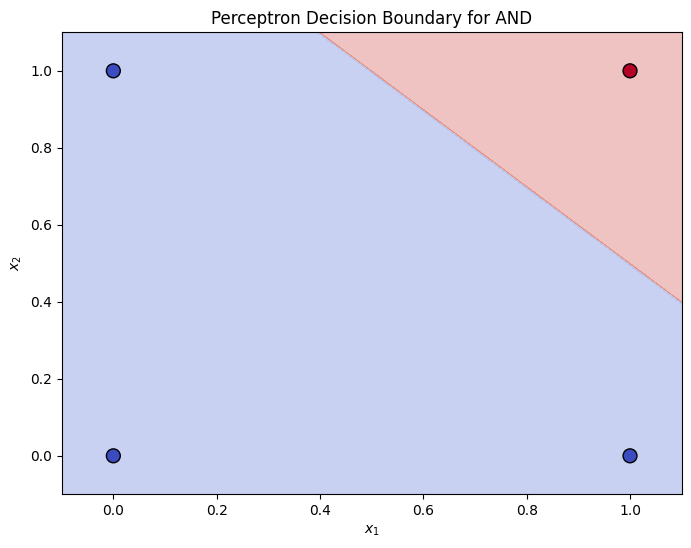

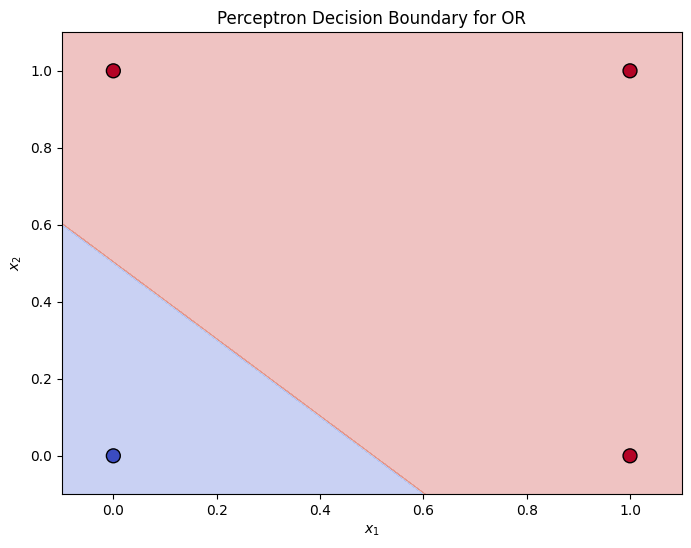

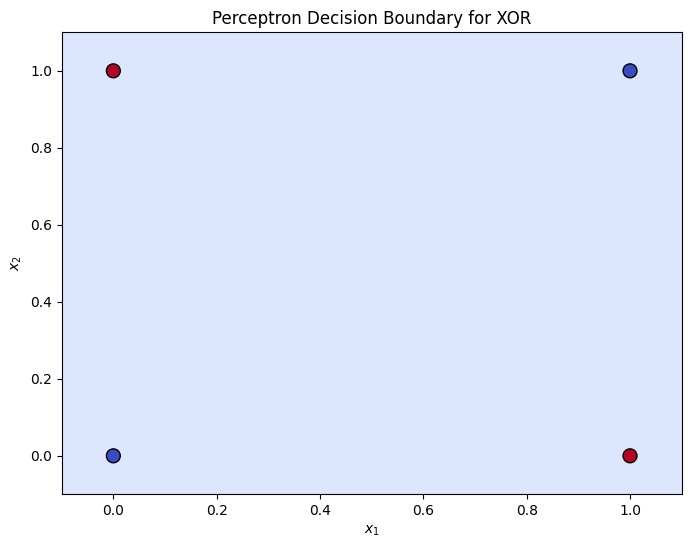

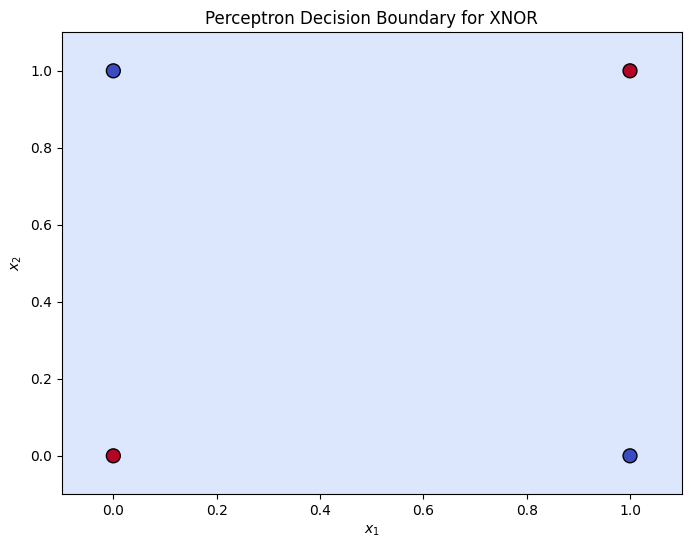

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Define the truth tables for different boolean functions
def get_data(func_type):
    if func_type == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([-1, -1, -1, 1])  # AND
    elif func_type == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([-1, 1, 1, 1])  # OR
    elif func_type == "XOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([-1, 1, 1, -1])  # XOR
    elif func_type == "XNOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([1, -1, -1, 1])  # XNOR
    return X, y

# Train a Perceptron and plot decision boundaries
def train_and_plot(func_type):
    # Get the dataset for the given function
    X, y = get_data(func_type)

    # Initialize and fit the Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X, y)

    # Visualize the decision boundary
    plt.figure(figsize=(8, 6))
    plt.title(f"Perceptron Decision Boundary for {func_type}")

    # Plot decision boundary
    ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = perceptron.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    ax.contourf(XX, YY, Z, alpha=0.3, cmap='coolwarm')

    # Plot the training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

# Test the Perceptron on different boolean functions
functions = ["AND", "OR", "XOR", "XNOR"]
for func in functions:
    train_and_plot(func)
